In [1]:
import numpy as np
import math
import random

patterns = []
classes = []

filename = 'iris.txt'
file = open(filename,'r')

for line in file.readlines():
    row = line.strip().split(',')
    patterns.append(row[0:4])
    classes.append(row[4])
print("Iris Data Loaded")
file.close

patterns = np.asarray(patterns,dtype=np.float32)

print("101th record in pattern: " + str(patterns[100]))
print("Class of the above pattern: " + str(classes[100]))

Iris Data Loaded
101th record in pattern: [4.7 3.2 1.3 0.2]
Class of the above pattern: 1


In [2]:
# som_make function documentation of the som toolbox
# It uses a heuristic formula of 'munits = 5*dlen^0.54321'. The 'mapsize' argument influences the final number of map units: a 'big' map has x4 the default number of map units and a 'small' map has x0.25 the default number of map units.
#Large maps produce a large number of small but "compact" clusters (records assigned to each cluster are quite similar). Small maps produce less but more generilized clusters. A "right number of clusters" doesn't exists, especially in real world datasets. It all depends on the detail which you want to examine your dataset.
def mapunits(input_len,size='small'):
    
    heuristic_map_units = 5*input_len**0.54321
     
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
        
    return heuristic_map_units
        
        
map_units = mapunits(len(patterns),size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))


Heuristically computed appropriate no. of map units: 304


In [3]:
%matplotlib inline

def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    #print(x)
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP

input_dimensions = 4

map_width = 30
map_height = 30
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

epochs = 1500
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations

convergence = [1]

timestep=1
e=0.001 
flag=0

epoch=0
while epoch<epochs:
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):
        
        # difference between prev_MAP and MAP
        J = np.linalg.norm(MAP - prev_MAP)
        #print(J)
        # J = || euclidean distance between previous MAP and current MAP  ||

        if  J <= e: #if converged (convergence criteria)
            flag=1
            break
            
        else:
            
            #if timestep == max_iterations and timestep != too_many_iterations:
            #    epochs += 1
            #    max_iterations = epochs*len(patterns)
            
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            
            # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
            #BMU[1] = np.argmin(Eucli_MAP, 1)[int(BMU[0])]
    
            #Eucli_from_BMU = Eucli_dists(coordinate_map,BMU)  
        
            prev_MAP = np.copy(MAP)
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        #theta = math.exp(-(distance**2)/(2*(radius**2)))
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            #time_constant = max_iterations/math.log(radius) 
            radius = radius0*math.exp(-epoch/epochs)
            #print([learning_rate, radius])
            
            timestep+=1
    
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)
    
    if flag==1:
        break
    epoch+=1

Lower error found: 0.7867626354311668 at epoch: 1
	Learning rate: 0.09993333333333333
	Neighbourhood radius: 14.990003332592716
Lower error found: 0.6421379958805684 at epoch: 116
	Learning rate: 0.09226666666666666
	Neighbourhood radius: 13.883719126318553
Lower error found: 0.5952375042240927 at epoch: 185
	Learning rate: 0.08766666666666667
	Neighbourhood radius: 13.259534356904025
Lower error found: 0.5244648914879314 at epoch: 332
	Learning rate: 0.07786666666666667
	Neighbourhood radius: 12.021742288974485
Lower error found: 0.512868470032992 at epoch: 346
	Learning rate: 0.07693333333333334
	Neighbourhood radius: 11.910061349381873
Lower error found: 0.45881580882107403 at epoch: 389
	Learning rate: 0.07406666666666666
	Neighbourhood radius: 11.573486873654726
Lower error found: 0.4457461386852542 at epoch: 466
	Learning rate: 0.06893333333333333
	Neighbourhood radius: 10.99437231808208
Lower error found: 0.4389875768164647 at epoch: 498
	Learning rate: 0.0668
	Neighbourhood rad

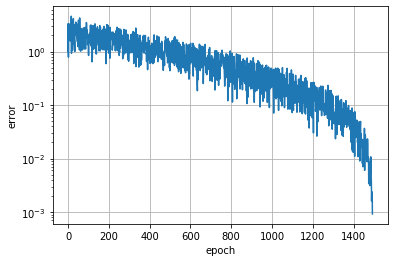

Number of timesteps: 223789
Final error: 0.0009237972907940616


In [4]:
import matplotlib.pyplot as plt
# Show a plot of the error at each epoch to show convergence, but this is guaranteed in SOM
# due to the learning rate and neighbourhood decay
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))


Red = 1
Green = 2
Blue = 3


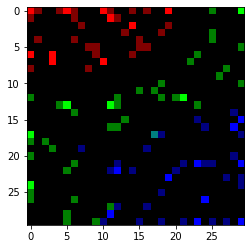

In [5]:
from PIL import Image

BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)

i=0
for pattern in patterns:
    
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)

    # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    
    x = BMU[0]
    y = BMU[1]
    
    if classes[i] == '1':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == '2':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == '3':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
#print result_map

print("Red = 1")
print("Green = 2")
print("Blue = 3")

plt.imshow(result_map, interpolation='nearest')